#Trabalho de Simulação
<br>
Grupo: Eduardo da Silva Barbosa (116150432) e Tainá da Silva Lima(116165607)<br>
Disciplina: Estatística e Probabilidade<br>
Professor: Nei Rocha

## Questão 1


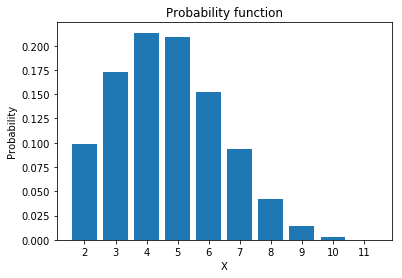

    x  P(X=x)
0   2  0.0988
1   3  0.1730
2   4  0.2134
3   5  0.2086
4   6  0.1526
5   7  0.0940
6   8  0.0418
7   9  0.0142
8  10  0.0034
9  11  0.0002


A esperança da variável X é:4.685199999999999
A variância da variável X é:2.9197009600000143


In [0]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

nOfSimu = 5000 #Número de simulações
frequencyX = np.zeros(12) #Armazenará a quantidade de ocorrência de cada X = {2,3,...,11}. OBS: as posições 0 e 1 não serão utilizadas.
imgX = np.array([2,3,4,5,6,7,8,9,10,11]) #imagem de X

def experiment(): #É equivalente ao experimento de contar a quantidade de bolas retiradas da urna até que saía uma bola já retirada. Essa função retornará a quantidade de bolas retiradas até que isso ocorra.
  balls = np.zeros(10)
  steps = 0
  for i in range(0, 11):
    steps+=1
    ball = random.randint(0, 9)
    balls[ball]+=1
    if(balls[ball] == 2):
      break
  return steps

def probFunction(frequencyX, nOfSimu): #Retorna a função de probabilidade. OBS: as posições 0 e 1 não são utilizadas. 
    distributionX = np.zeros(12)
    for i in range(2,12):
      distributionX[i] = frequencyX[i]/nOfSimu
    return distributionX

def expectation(X, P): # Retorna a esperança de X dada a função de probabilidade P
    sum = 0
    for xi,pxi in zip(X,P):
        sum += xi*pxi
    return sum

def variance(X, P): # Retorna a variância de X dada a função de probabilidade P
    sum = 0
    for xi,pxi in zip(X,P):
            sum += xi*xi*pxi
    
    return sum-pow(expectation(X, P),2)

#main

for i in range(nOfSimu):
    result = experiment()
    frequencyX[result] += 1

distributionX = probFunction(frequencyX[:], nOfSimu)
exp = expectation(imgX, distributionX[2:]) 
var = variance(imgX, distributionX[2:])

df = pd.DataFrame(zip(imgX,distributionX[2:]), columns = ['x' , 'P(X=x)'])

#Imprimir as informações
plt.bar(imgX,distributionX[2:])
plt.ylabel('Probability')
plt.xlabel('X')
plt.xticks(imgX)
plt.title('Probability function')
plt.show()

print(df)
print("\n")
print("A esperança da variável X é:" + str(exp))
print("A variância da variável X é:" + str(var))


##Questão 2

Dado a variável aleatória X apresentada pela questão, onde sua função de densidade é:

<center>$f(x) = \left\{\begin{matrix}
\frac{10}{x^{2}} &, x > 10\\ 
 0 &, x \leq 10 
\end{matrix}\right.$</center>

A partir disso, podemos calcular a sua função de densidade acumulada, dada por:

<center>$F_{x}(x) = \int_{-\infty}^{x} f(t)dt = \int_{10}^{x} \frac{10}{t^{2}}dt ={\left [ -\frac{10}{t} \right ]_{10}}^{x} $</center> <br><br>
<center>$F_{x}(x) = 1 - \frac{10}{x} , x\geq 10$</center>

Utilizando isso, podemos considerar $U = F(X)$, onde por conta de U ser a função de distribuição acumulada de $X$, $U$ tem distribuição uniforme em (0,1). Ou seja:<br>
<center>$U= 1 - \frac{10}{X}$ <br></center>
Portanto:<br>
<center>$X = \frac{10}{1-U}$</center>

Tal definição será utilizada no código abaixo para simular $X$, bem como cálcular sua esperança. 

In [0]:
import numpy as np
import random

media = 0

for i in range (0,1000):
  x = 10/(1-np.random.random_sample()) # Simulação de X (X = 10/1-U)
  media = media + x
  
print("A esperança de X é aproximadamente:", media/1000)

A esperança de X é aproximadamente: 68.50505175406565


Executando o código acima várias vezes, é possível verificar que a média resulta em valores relativamente distintos, de maneira que não esteja convergindo para nenhum valor. <br>
Isso se dá porque ao calcular da esperança de maneira analítica, temos que esta tende ao infinito, tornando-a divergente. <br>
<center>$E(X) = \int_{-\infty}^{\infty} xf(x)dx = \int_{10}^{\infty} x\frac{10}{x^{2}}dx$<br><br>
$= 
10\int_{10}^{\infty} \frac{1}{x}dx$<br> <br>
$= 10{\left [ lnx \right ]_{10}}^{\infty}$ <br><br>
$= 10\left [lim_{x\rightarrow \infty}lnx - ln10  \right ] = \infty$</center>



##Questão 3

In [0]:
import numpy as np
import random
import math

nOfPoints = 10000

def f(x): #Representa o integrando 
  return (4*(x**2)*math.exp(-3*(x**2)))

def generatePoints(n, lower, higher): #Gera n pontos aleatórios cujo o x está no intervalo enviado
  points = []
  
  for i in range(n):
    x = random.uniform(lower,higher)
    point = [x, f(x)]
    points.append(point)
  
  return points  
  
def monteCarlo(lowerL,higherL):#Calcula a integral através do método de Monte Carlo
  points = generatePoints(nOfPoints, lowerL, higherL)
  
  sum = 0
  for point in points:
    sum += point[1]
  
  average = float(sum/nOfPoints) #Dado os pontos escolhidos, é feita a média de suas imagens por f (aproximação da esperança)
  return (higherL - lowerL)*average #A aproximação da integral desejada é dada pela média*(tamanho do intervalo)


print("O resultado da integral desejada é aproximadamente: " + str(monteCarlo(-1.5,1.5)))
   
  

O resultado da integral desejada é aproximadamente: 0.675602554288599


O método de Monte Carlo permite que integrais definidas de funções que analiticamente não seriam possíveis de se encontrar um resultado, sejam resolvidas de uma maneira relativamente simples. <br>Basicamente o método calcula tais integrais utilizando a ideia da esperança, encontrada através de manipulações algébricas na integral. Outra maneira de se ver é através do cálculo do ponto médio de uma função, dado pela seguite equação:

<center>$E = \frac{1}{b-a}\int_{a}^{b}f(x)dx $<br><br>
$\int_{a}^{b}f(x)dx = E(b-a) $</center><br>

Para a resolução deste exercício, não foi feita a integral abaixo do integrando de $-\infty$ a $\infty$, e sim somente abaixo desses dois "morros" visíveis no gráfico, que é onde a maior parte da área desejada está. Como a função decresce rapidamente para 0 para  $x > 1.5 $ e $x < -1.5 $ (aproximadamente), a área abaixo de $f(x)$ nesses intervalos são muito pequenas. Portanto, o erro gerado será pequeno.<br>
Sendo assim, a integral foi feita entre -1.5 e 1.5. 
Foi criado vários pontos dentro deste intervalo e calculado suas respectivas imagens, e, partir disso, a média foi encontrada e multiplicada pelo tamanho do intervalo dos limites de integração. <br>
Executando várias vezes este algoritmo, chegamos a valores muito próximos, a maioria deles por volta de 0.68.





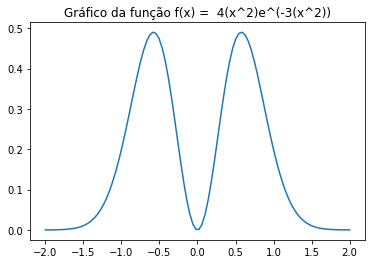

In [0]:
import pylab
import numpy as np

#Código para plotar o gráfico dado na questão
x = np.linspace(-2,2,100) 
y =  4*(x**2)*np.exp(-3*(x**2))


pylab.plot(x,y) 
pylab.title('Gráfico da função f(x) =  4(x^2)e^(-3(x^2))')
pylab.show()

##Questão **4**

    x = número de movimentos  P(X=x)
0                          5  0.0442
1                          6  0.0082
2                          7  0.0530
3                          8  0.0504
4                          9  0.0744
5                         10  0.0250
6                         11  0.0476
7                         12  0.0592
8                         13  0.0758
9                         14  0.0756
10                        15  0.0286
11                        16  0.0020
12                        17  0.0248
13                        18  0.0268
14                        19  0.0374
15                        20  0.0178
16                        21  0.0312
17                        22  0.0618
18                        23  0.0044
19                        24  0.0492
20                        25  0.0180
21                        26  0.0026
22                        27  0.0178
23                        28  0.0446
24                        29  0.0002
25                        30  0.0098
2

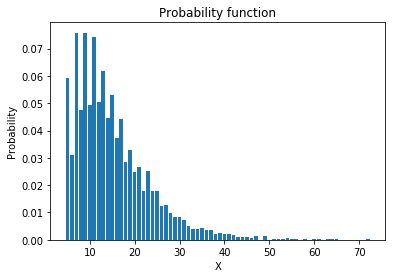

Esperança:  15.033600000000002


In [0]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def experiment(): #Representa o experimento de visitar todos os nós ao menos uma vez
  node = np.zeros(6) #Cada posição representa um nó
  node[0] = 1 #O nó 0 já começa como visitado
  i = 0
  cont = 0
  while(0 in node):
    cont+=1
    if(random.randint(1,10) > 5):
      node[(i+1)%6]+=1
      i = (i+1)%6
    else:
      if(i == 0):
        node[5]+=1
        i = 5
      else:
        node[(i-1)%6]+=1
        i=(i-1)%6
  return cont

def simulation(nOfSimu):
    x = {} #O dicionário x guardará a imagem de x associada a quantidade de vezes que o mesmo ocorreu
    for i in range(0,nOfSimu):
        temp = experiment()
        if(temp in x):
            x[temp] = x[temp] + 1
        else:
            x[temp] = 1
    return x

def probFunction(x, nOfSimu): #Retorna a função de probabilidade. OBS: as posições 0 e 1 não são utilizadas. 
    for key in x.keys():
        x[key] = x[key]/nOfSimu
    
    df = pd.DataFrame(zip(sorted(x.keys()),x.values()), columns = ['x = número de movimentos' , 'P(X=x)'])
    print(df)
    return x
  
def expectation(x): # Retorna a esperança de X
    sum = 0
    for key in x.keys():
        sum = sum + key*x[key]
    return sum
    
nOfSimu = 5000
x = simulation(nOfSimu)
x = probFunction(x, nOfSimu)
exp = expectation(x)
plt.bar(x.keys(),x.values())
plt.ylabel('Probability')
plt.xlabel('X')
#plt.xticks(x.values())
plt.title('Probability function')
plt.show() 
print("Esperança: ", exp)


##Questão 5

In [0]:
import numpy as np

class MarkovChain: #Define a cadeia de markov
  def __init__(self,nOfStates, P): #Cria a cadeia dado um número de estados (nOfStates) e sua matriz com as probabilidades de transição (P)
    self.nOfStates = nOfStates
    self.currState = -1
    self.P = P
    self.visitation = np.array([0,1,0,0])

  def wasAbsorbed(self,currState): #Verifica se o estado que estou é um estado de absorção
    return True if(self.P[currState][currState] == 1) else False

  def start(self,inicialState): #Inicializa a cadeia dado o estado inicial
    self.currState = inicialState

    while ( not(self.wasAbsorbed(self.currState)) ): #Enquando não estou num estado de absorção, faço um movimento
      self.currState = self.move() #Faz um movimento, retornando o estado para onde me movi
      self.visitation[self.currState] += 1 
      

    return self.currState, self.visitation  

# Esta função realiza o movimento e sua ideia é comparar o random sorteador (0 até 1) com cada coluna da matriz de transição,
# referente a linha do estado atual:
# 1) Caso o random seja menor que a probabilidade da primeira saída(coluna), então o número da coluna será o novo estado atual.
# 2) Caso contrário deverá ir para a próxima coluna e ver se o random é menor que a soma da probabilidade da coluna anterior com a atual. 
#    Caso seja a atual coluna será o novo estado e assim sucessivamente. 
  def move(self): 
    temp = 0
    nextState = -1
    random = np.random.random_sample() #Gera um número aleatório de 0 a 1
    for i in range(0,4):
      temp += self.P[self.currState][i]
      if(random < temp and self.P[self.currState][i] != 0):
        nextState = i
        break
    return nextState 


nOfSimu = 1000
nOfStates = 4
P = [[1,0,0,0],[0.3,0,0.7,0],[0,0.3,0,0.7],[0,0,0,1]]

whereWasAbs = np.zeros(2) #Array com o número de vezes em que a cadeia foi absorvida em 0 e o mesmo para 3
nOfVisitsTotal = np.zeros(2) #Array com o número de visitas feitas ao estado 1 e 2 antes da absorção

for i in range(0,nOfSimu): #Para cada simulação
  chain = MarkovChain(nOfStates,P) #Crio uma cadeia
  finalState, visitation = chain.start(1)#Inicio a cadeia no estado 1
  if(finalState == 0):
    whereWasAbs[0]+=1 #Guardo onde ocorreu a absorção
  elif (finalState == 3):
    whereWasAbs[1]+=1
  nOfVisitsTotal[0] += visitation[1] 
  nOfVisitsTotal[1] += visitation[2]

print("Probabilidade da cadeia ser absorvida no estado 0:",whereWasAbs[0]/nOfSimu)
print("Probabilidade da cadeia ser absorvida no estado 3:",whereWasAbs[1]/nOfSimu)
print("O valor médio de visitas de visitas ao estado 1 antes da absorção é:", nOfVisitsTotal[0]/nOfSimu)
print("O valor médio de visitas de visitas ao estado 2 antes da absorção é:", nOfVisitsTotal[1]/nOfSimu)

Probabilidade da cadeia ser absorvida no estado 0: 0.39
Probabilidade da cadeia ser absorvida no estado 3: 0.61
O valor médio de visitas de visitas ao estado 1 antes da absorção é: 1.251
O valor médio de visitas de visitas ao estado 2 antes da absorção é: 0.861
